In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.risks as risks
import mlgrad.gd as gd
import mlgrad.inventory as inventory

In [3]:
df = pd.read_csv("data/animals.csv", sep=",")
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [4]:
X = np.log(df.body.values)
Y = np.log(df.brain.values)
Xs = X.reshape(-1,1)

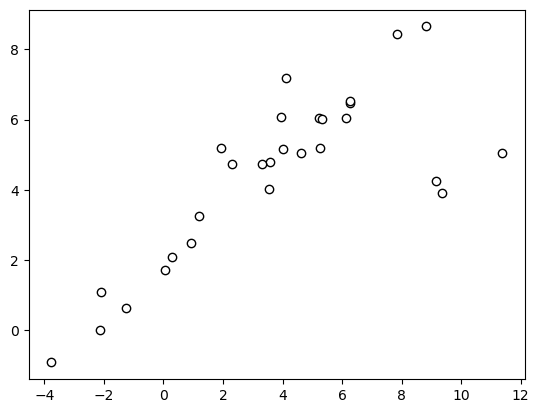

In [5]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.show()

In [6]:
import mlgrad.plots as plots

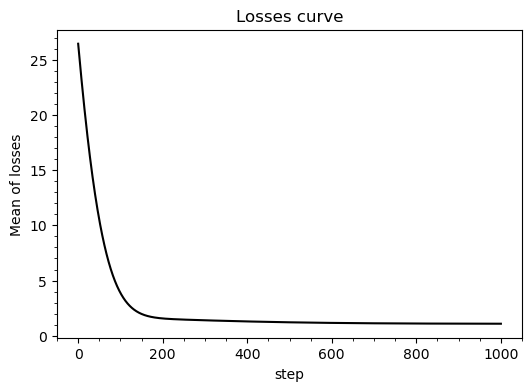

In [7]:
loss_func = loss.ErrorLoss(funcs.Square())
linmod = models.LinearModel(1)
linmod.init_param()
risk_func = risks.ERisk(Xs, Y, linmod, loss_func)
alg = gd.FG(risk_func, h=0.01)
alg.use_gradient_averager("AdaM2")
alg.fit()

plots.plot_losses(alg)

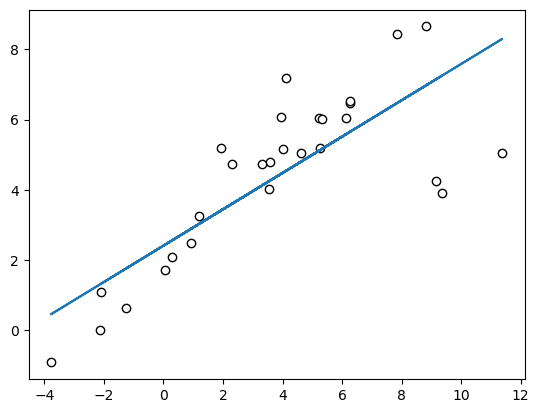

In [8]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate(Xs))
plt.show()

In [9]:
import mlgrad.regr as regr

In [10]:
linmod1 = models.LinearModel(1)
alg2 = regr.regression(Xs, Y, linmod1, loss_func, h=0.1)

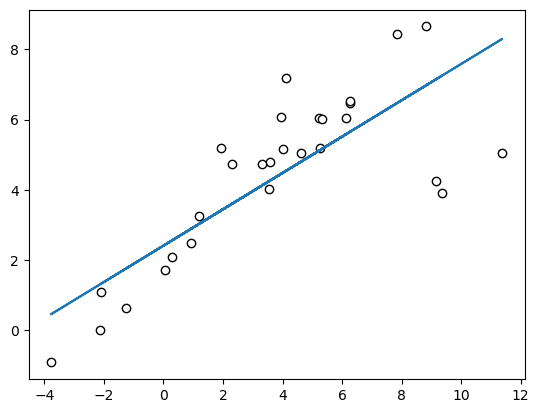

In [11]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate(Xs))
plt.show()

In [12]:
E = abs(Y - linmod.evaluate(X[:,None]))

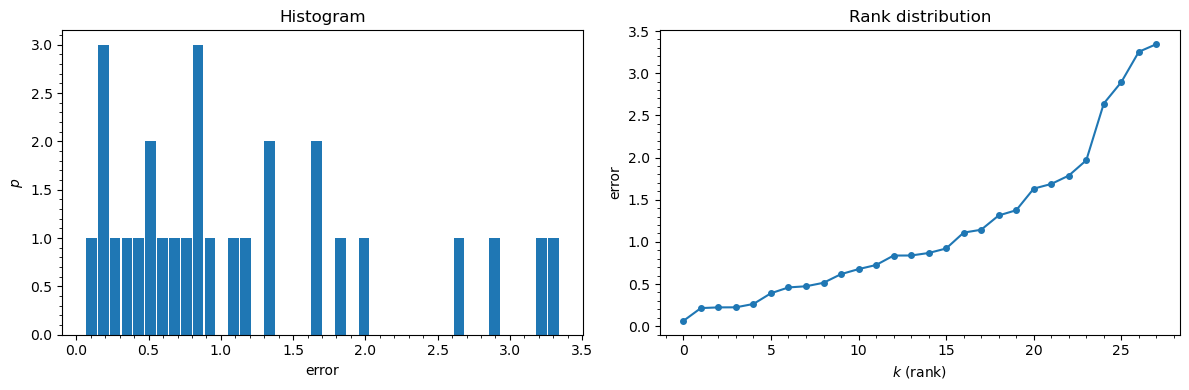

In [13]:
plots.plot_hist_and_rank_distribution(E, ylabel="error")

In [14]:
Z = inventory.zscore(E)

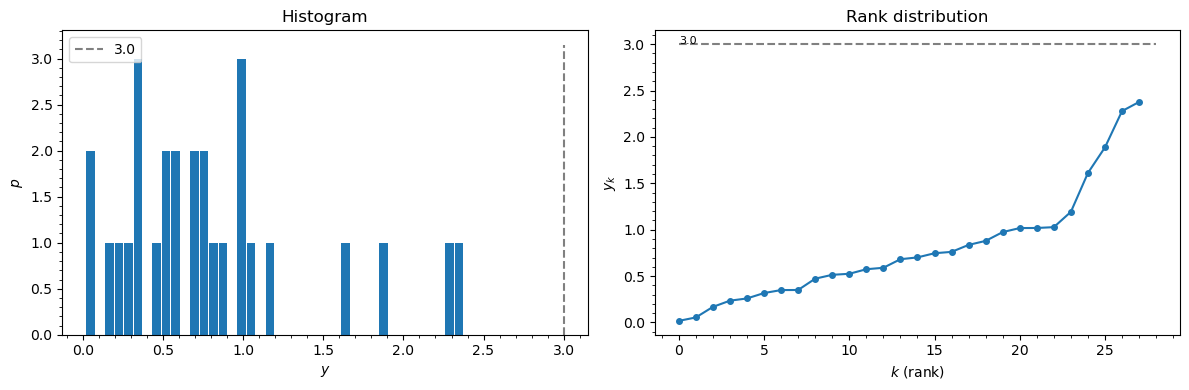

In [15]:
plots.plot_hist_and_rank_distribution(abs(Z), levels=[3.0])

In [16]:
Zm = inventory.modified_zscore(Z)

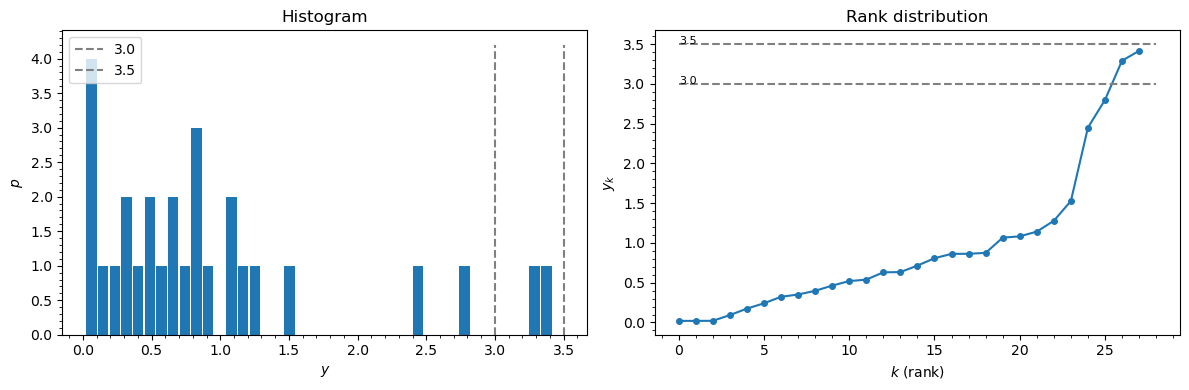

In [17]:
plots.plot_hist_and_rank_distribution(abs(Zm), levels=[3.0, 3.5])

In [18]:
X1 = X[Zm < 3]
Y1 = Y[Zm < 3]

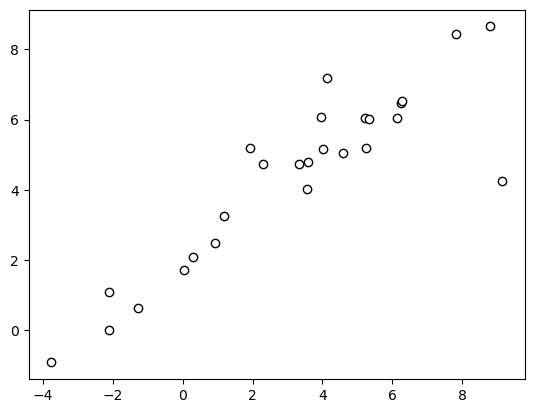

In [19]:
plt.scatter(X1, Y1, c="w", edgecolors="k")
plt.show()

In [20]:
linmod2 = models.LinearModel(1)
alg2 = regr.regression(X1[:,None], Y1, linmod2, loss_func, h=0.1)
E2 = abs(Y1 - linmod2.evaluate(X1[:,None]))
Z2 = inventory.modified_zscore(E2)

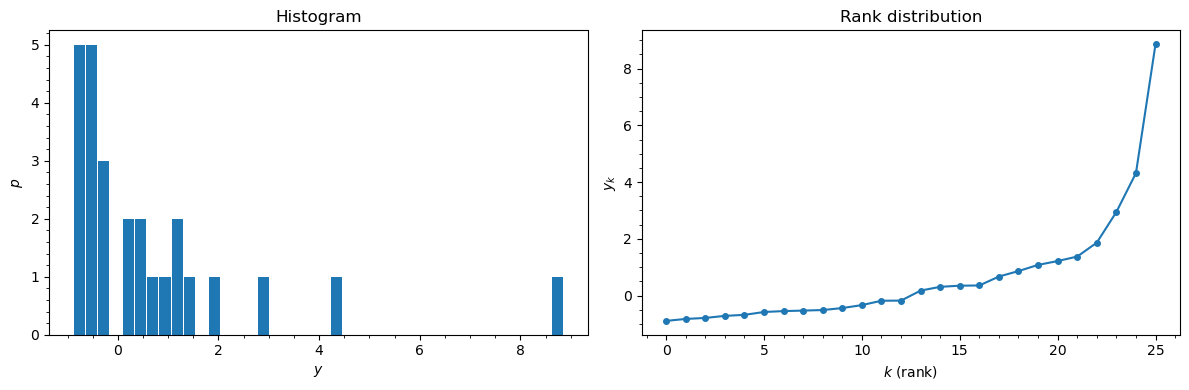

In [21]:
plots.plot_hist_and_rank_distribution(Z2)

In [22]:
X2 = X1[Z2 < 3.5]
Y2 = Y1[Z2 < 3.5]

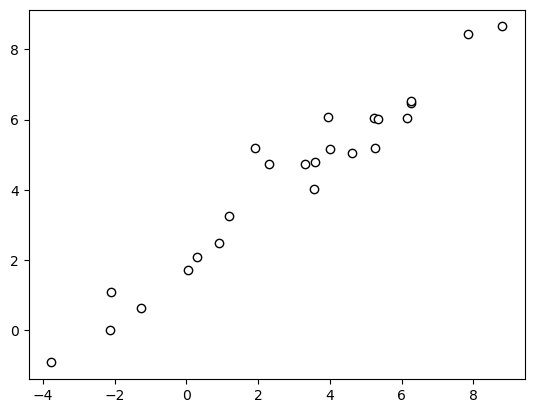

In [23]:
plt.scatter(X2, Y2, c="w", edgecolors="k")
plt.show()

In [24]:
linmod3 = models.LinearModel(1)
alg3 = regr.regression(X2[:,None], Y2, linmod3, loss_func, h=0.1)
E3 = abs(Y2 - linmod3.evaluate(X2[:,None]))
Z3 = inventory.modified_zscore(E3)

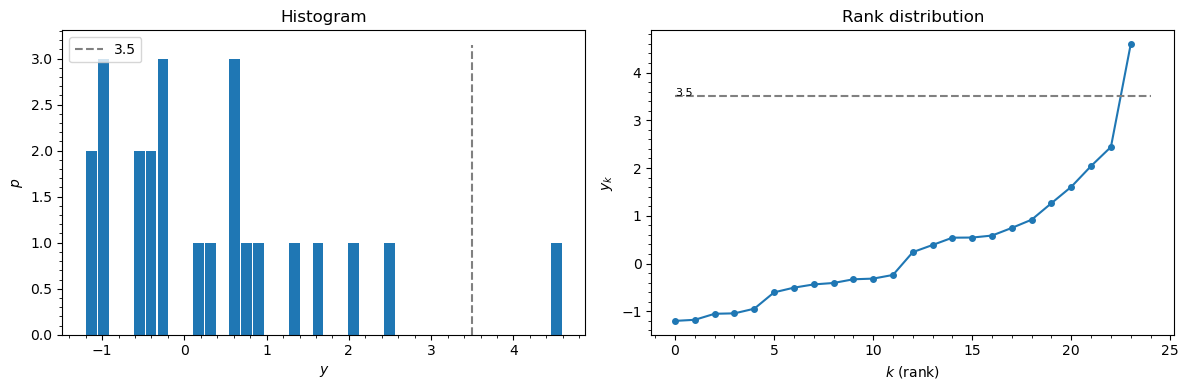

In [25]:
plots.plot_hist_and_rank_distribution(Z3, levels=[3.5])

In [26]:
X3 = X2[Z3 < 3.5]
Y3 = Y2[Z3 < 3.5]

In [27]:
linmod4 = models.LinearModel(1)
alg3 = regr.regression(X3[:,None], Y3, linmod4, loss_func, h=0.1)
E4 = abs(Y3 - linmod4.evaluate(X3[:,None]))
Z4 = inventory.modified_zscore(E4)

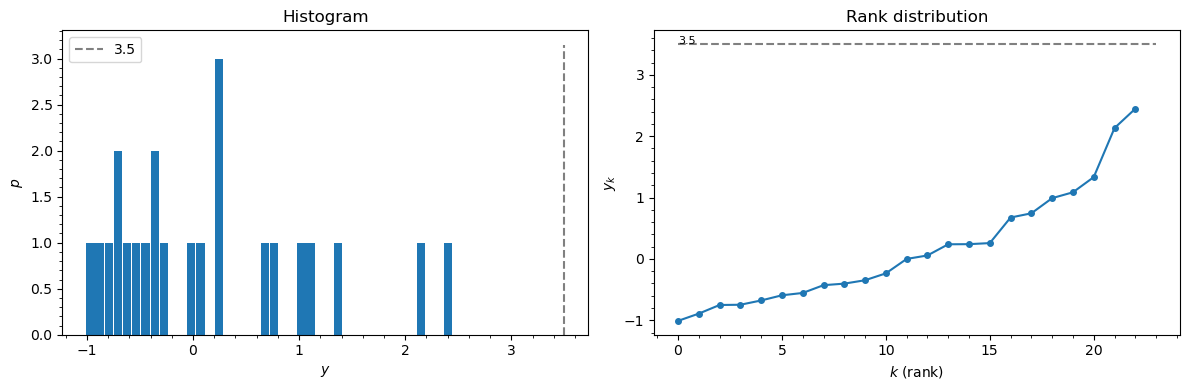

In [32]:
plots.plot_hist_and_rank_distribution(Z4, levels=[3.5])

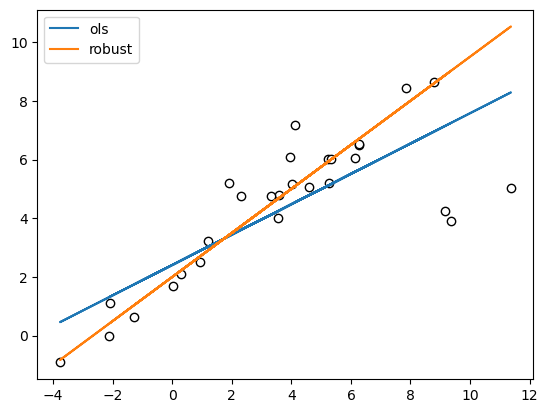

In [29]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.plot(X, linmod.evaluate(Xs), label='ols')
plt.plot(X, linmod4.evaluate(Xs), label='robust')
plt.legend()
plt.show()

In [30]:
EE = abs(Y - linmod4.evaluate(Xs))
ZZ = inventory.modified_zscore(EE)

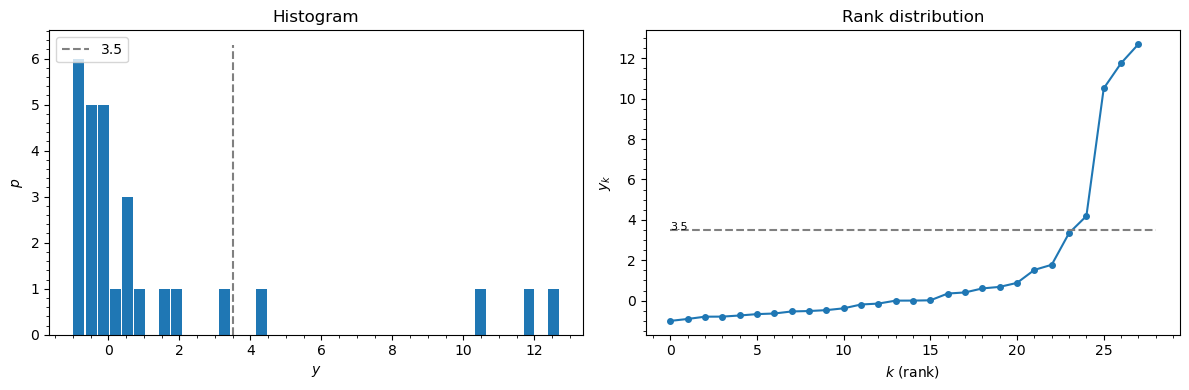

In [33]:
plots.plot_hist_and_rank_distribution(ZZ, levels=[3.5])